<a href="https://colab.research.google.com/github/hardikr10/Finance-Projects/blob/main/Health_care_equip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
# Cell 1: Import Libraries & Extract S&P 500 Company Data

import pandas as pd
import numpy as np
import yfinance as yf
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime

# Extract the S&P 500 companies table from Wikipedia
sp = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies', header=0)[0]

# Clean column names: remove spaces and convert to lowercase
sp.columns = sp.columns.str.replace(' ', '_').str.lower()
sp




,symbol,security,gics_sector,gics_sub-industry,headquarters_location,date_added,cik,founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [ ]:
# Cell 2: Filter for Pharmaceutical Companies from the S&P 500 List
hce = sp[sp['gics_sub-industry'] == 'Health Care Equipment']
hce_tickers=hce['symbol'].tolist()
hce_tickers

['ABT',
 'BAX',
 'BDX',
 'BSX',
 'DXCM',
 'EW',
 'GEHC',
 'HOLX',
 'IDXX',
 'PODD',
 'ISRG',
 'MDT',
 'RMD',
 'RVTY',
 'STE',
 'SYK',
 'TFX',
 'ZBH']

In [ ]:
start_date = '2010-01-01'
end_date = '2025-02-20'


In [ ]:
stock_data=yf.download(hce_tickers, start= "2010-01-01", end= "2025-02-20")['Close']
percentage_null = stock_data.isnull().sum() / len(stock_data)
missing = percentage_null[percentage_null > 0.10].index
stock_data.drop(missing, axis=1, inplace=True)
stock_data

[*********************100%***********************]  18 of 18 completed


Ticker,ABT,BAX,BDX,BSX,DXCM,EW,HOLX,IDXX,ISRG,MDT,PODD,RMD,RVTY,STE,SYK,TFX,ZBH
Date,,,,,,,,,,,,,,,,,
2010-01-04,18.665758,23.544436,59.642899,9.010000,2.140000,7.289167,14.940000,27.040001,34.307777,30.600872,15.030000,22.080542,18.967304,22.998339,43.082489,47.319729,52.236485
2010-01-05,18.514956,23.382870,59.088959,9.040000,2.172500,7.341667,14.940000,27.084999,34.153332,31.228226,15.000000,21.143616,19.197042,22.973940,43.487221,46.816597,53.890099
2010-01-06,18.617773,23.463659,58.929607,9.160000,2.237500,7.422500,15.010000,27.150000,34.648888,31.742918,14.670000,21.821217,19.573816,22.949556,44.156265,47.285629,53.872677
2010-01-07,18.772018,23.843332,58.914459,9.090000,2.302500,7.490000,14.990000,28.180000,34.518890,32.037025,14.800000,21.858858,19.518681,22.616253,45.634747,47.720524,55.108532
2010-01-08,18.867979,23.899889,59.119301,9.000000,2.260000,7.456667,14.970000,27.955000,34.328888,32.205086,14.060000,21.846310,19.693281,22.502449,45.775150,48.001942,53.951012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-12,130.490005,30.290001,225.850006,105.769997,83.870003,75.820000,63.529999,457.350006,589.609985,91.349998,279.549988,236.070007,111.269997,219.110001,385.630005,168.330002,98.989998
2025-02-13,131.789993,30.620001,225.009995,106.139999,84.089996,76.000000,63.619999,459.760010,591.390015,92.199997,282.119995,239.479996,112.879997,219.229996,388.369995,167.610001,99.910004
2025-02-14,130.610001,30.820000,224.800003,106.110001,89.070000,76.190002,63.240002,444.529999,595.549988,92.809998,280.559998,232.979996,112.260002,219.339996,385.179993,167.429993,100.519997


In [ ]:
monthly_prices=stock_data.resample('ME').last()
monthly_prices


Ticker,ABT,BAX,BDX,BSX,DXCM,EW,HOLX,IDXX,ISRG,MDT,PODD,RMD,RVTY,STE,SYK,TFX,ZBH
Date,,,,,,,,,,,,,,,,,
2010-01-31,18.277308,23.261690,57.191929,8.630000,2.265000,7.468333,15.070000,26.245001,36.451111,30.034271,13.630000,21.390392,18.568445,21.201723,42.884254,48.743839,49.016308
2010-02-28,18.739935,22.995113,59.088959,7.740000,2.260000,7.652500,17.250000,26.400000,38.571110,30.391399,14.700000,23.874924,20.476925,25.787640,43.858910,51.967285,49.895340
2010-03-31,18.187548,23.623260,60.024097,7.220000,2.435000,8.240000,18.540001,28.775000,38.681110,31.532822,15.090000,26.622965,22.035049,27.460045,47.385124,54.942974,51.522827
2010-04-30,17.811567,19.166498,58.224834,6.880000,2.737500,8.590000,17.879999,33.070000,40.062222,30.733120,13.810000,28.622303,23.163622,27.150038,47.567299,52.584705,53.011074
2010-05-31,16.558218,17.141073,54.359428,6.050000,2.632500,8.421667,14.900000,31.620001,35.863335,27.560629,14.570000,26.305080,20.981335,26.057117,43.915283,48.365883,48.676888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-31,112.778175,35.517803,232.485855,84.019997,70.480003,67.010002,80.870003,406.920013,503.839996,88.484375,231.529999,241.404846,118.520546,221.267502,355.453857,200.701675,106.679886
2024-11-30,118.149979,33.709999,220.851105,90.660004,77.989998,71.349998,79.500000,421.750000,542.000000,85.797623,266.779999,248.462189,116.071983,219.059998,391.240662,192.850006,111.848251
2024-12-31,112.519531,29.160000,226.869995,89.320000,77.769997,74.029999,72.089996,413.440002,521.960022,79.879997,261.070007,228.177719,111.544640,205.559998,360.049988,177.979996,105.629997


In [ ]:
monthly_returns=monthly_prices.pct_change().dropna()
monthly_returns

Ticker,ABT,BAX,BDX,BSX,DXCM,EW,HOLX,IDXX,ISRG,MDT,PODD,RMD,RVTY,STE,SYK,TFX,ZBH
Date,,,,,,,,,,,,,,,,,
2010-02-28,0.025312,-0.011460,0.033170,-0.103129,-0.002208,0.024660,0.144658,0.005906,0.058160,0.011891,0.078503,0.116152,0.102781,0.216299,0.022728,0.066130,0.017933
2010-03-31,-0.029476,0.027317,0.015826,-0.067183,0.077434,0.076772,0.074783,0.089962,0.002852,0.037557,0.026531,0.115102,0.076092,0.064853,0.080399,0.057261,0.032618
2010-04-30,-0.020672,-0.188660,-0.029976,-0.047091,0.124230,0.042476,-0.035599,0.149262,0.035705,-0.025361,-0.084824,0.075098,0.051217,-0.011289,0.003845,-0.042922,0.028885
2010-05-31,-0.070367,-0.105675,-0.066388,-0.120640,-0.038356,-0.019596,-0.166667,-0.043846,-0.104809,-0.103227,0.055033,-0.080959,-0.094212,-0.040255,-0.076776,-0.080229,-0.081760
2010-06-30,-0.016400,-0.030842,-0.046579,-0.041322,0.097816,0.108648,-0.065101,-0.037002,-0.022152,-0.074272,0.032944,-0.033074,-0.089026,-0.023563,-0.053171,-0.032097,-0.033613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-31,-0.000927,-0.059784,-0.031149,0.002625,0.051313,0.015457,-0.007243,-0.194569,0.025587,-0.008664,-0.005242,-0.006759,-0.071156,-0.085305,-0.013785,-0.187045,-0.009541
2024-11-30,0.047632,-0.050899,-0.050045,0.079029,0.106555,0.064766,-0.016941,0.036444,0.075738,-0.030364,0.152248,0.029234,-0.020659,-0.009977,0.100679,-0.039121,0.048447
2024-12-31,-0.047655,-0.134975,0.027253,-0.014781,-0.002821,0.037561,-0.093208,-0.019704,-0.036974,-0.068972,-0.021403,-0.081640,-0.039005,-0.061627,-0.079722,-0.077107,-0.055595


In [ ]:
#downlaod SP 500 index data
sp500=yf.download('^GSPC', start= "2010-01-01", end= "2025-02-20")['Close']
sp500_monthly=sp500.resample('ME').last()
sp500_returns=sp500_monthly.pct_change().dropna()
sp500_returns

[*********************100%***********************]  1 of 1 completed


Ticker,^GSPC
Date,
2010-02-28,0.028514
2010-03-31,0.058796
2010-04-30,0.014759
2010-05-31,-0.081976
2010-06-30,-0.053882
...,...
2024-10-31,-0.009897
2024-11-30,0.057301
2024-12-31,-0.024990


In [ ]:
# Merge S&P 500 returns with the monthly returns
merged_returns = pd.merge(monthly_returns, sp500_returns, left_index=True, right_index=True, how='inner')
merged_returns


Ticker,ABT,BAX,BDX,BSX,DXCM,EW,HOLX,IDXX,ISRG,MDT,PODD,RMD,RVTY,STE,SYK,TFX,ZBH,^GSPC
Date,,,,,,,,,,,,,,,,,,
2010-02-28,0.025312,-0.011460,0.033170,-0.103129,-0.002208,0.024660,0.144658,0.005906,0.058160,0.011891,0.078503,0.116152,0.102781,0.216299,0.022728,0.066130,0.017933,0.028514
2010-03-31,-0.029476,0.027317,0.015826,-0.067183,0.077434,0.076772,0.074783,0.089962,0.002852,0.037557,0.026531,0.115102,0.076092,0.064853,0.080399,0.057261,0.032618,0.058796
2010-04-30,-0.020672,-0.188660,-0.029976,-0.047091,0.124230,0.042476,-0.035599,0.149262,0.035705,-0.025361,-0.084824,0.075098,0.051217,-0.011289,0.003845,-0.042922,0.028885,0.014759
2010-05-31,-0.070367,-0.105675,-0.066388,-0.120640,-0.038356,-0.019596,-0.166667,-0.043846,-0.104809,-0.103227,0.055033,-0.080959,-0.094212,-0.040255,-0.076776,-0.080229,-0.081760,-0.081976
2010-06-30,-0.016400,-0.030842,-0.046579,-0.041322,0.097816,0.108648,-0.065101,-0.037002,-0.022152,-0.074272,0.032944,-0.033074,-0.089026,-0.023563,-0.053171,-0.032097,-0.033613,-0.053882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-31,-0.000927,-0.059784,-0.031149,0.002625,0.051313,0.015457,-0.007243,-0.194569,0.025587,-0.008664,-0.005242,-0.006759,-0.071156,-0.085305,-0.013785,-0.187045,-0.009541,-0.009897
2024-11-30,0.047632,-0.050899,-0.050045,0.079029,0.106555,0.064766,-0.016941,0.036444,0.075738,-0.030364,0.152248,0.029234,-0.020659,-0.009977,0.100679,-0.039121,0.048447,0.057301
2024-12-31,-0.047655,-0.134975,0.027253,-0.014781,-0.002821,0.037561,-0.093208,-0.019704,-0.036974,-0.068972,-0.021403,-0.081640,-0.039005,-0.061627,-0.079722,-0.077107,-0.055595,-0.024990


In [ ]:
# Download TB3MS data from FRED
rf = web.DataReader('TB3MS', 'fred', start='1950-01-01', end=end_date)
rf

,TB3MS
DATE,
1950-01-01,1.07
1950-02-01,1.12
1950-03-01,1.12
1950-04-01,1.15
1950-05-01,1.16
...,...
2024-09-01,4.72
2024-10-01,4.51
2024-11-01,4.42


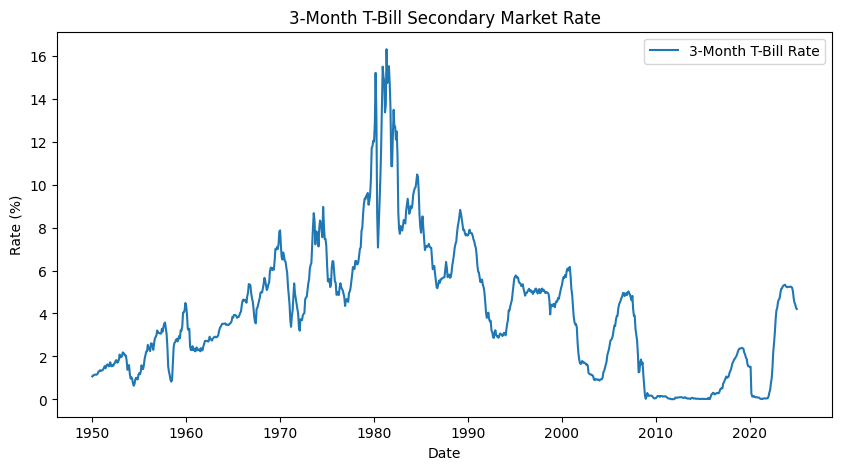

In [ ]:
# Plot the TB3MS rate
plt.figure(figsize=(10, 5))
plt.plot(rf.index, rf['TB3MS'], label='3-Month T-Bill Rate')
plt.title('3-Month T-Bill Secondary Market Rate')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend()
plt.show()


In [ ]:
# Resample the TB3MS data to monthly frequency using the last available observation of each month
rf_monthly = rf.resample('M').last()

# Convert TB3MS (which is an annualized percentage) to a monthly rate.
# One simple conversion: monthly_rate = (annual_rate/100) / 12
monthly_rf = rf_monthly / 100 / 12

# Rename column for clarity
monthly_rf = monthly_rf.rename(columns={'TB3MS': 'rf'})
monthly_rf

<ipython-input-23-d05caaa3575d>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rf_monthly = rf.resample('M').last()


,rf
DATE,
1950-01-31,0.000892
1950-02-28,0.000933
1950-03-31,0.000933
1950-04-30,0.000958
1950-05-31,0.000967
...,...
2024-09-30,0.003933
2024-10-31,0.003758
2024-11-30,0.003683


In [ ]:
# Merge the monthly risk-free rate ("rf") with the combined monthly returns ("merged_returns")
all_data = pd.merge(merged_returns, monthly_rf, left_index=True, right_index=True, how='inner')
all_data

,ABT,BAX,BDX,BSX,DXCM,EW,HOLX,IDXX,ISRG,MDT,PODD,RMD,RVTY,STE,SYK,TFX,ZBH,^GSPC,rf
2010-02-28,0.025312,-0.011460,0.033170,-0.103129,-0.002208,0.024660,0.144658,0.005906,0.058160,0.011891,0.078503,0.116152,0.102781,0.216299,0.022728,0.066130,0.017933,0.028514,0.000092
2010-03-31,-0.029476,0.027317,0.015826,-0.067183,0.077434,0.076772,0.074783,0.089962,0.002852,0.037557,0.026531,0.115102,0.076092,0.064853,0.080399,0.057261,0.032618,0.058796,0.000125
2010-04-30,-0.020672,-0.188660,-0.029976,-0.047091,0.124230,0.042476,-0.035599,0.149262,0.035705,-0.025361,-0.084824,0.075098,0.051217,-0.011289,0.003845,-0.042922,0.028885,0.014759,0.000133
2010-05-31,-0.070367,-0.105675,-0.066388,-0.120640,-0.038356,-0.019596,-0.166667,-0.043846,-0.104809,-0.103227,0.055033,-0.080959,-0.094212,-0.040255,-0.076776,-0.080229,-0.081760,-0.081976,0.000133
2010-06-30,-0.016400,-0.030842,-0.046579,-0.041322,0.097816,0.108648,-0.065101,-0.037002,-0.022152,-0.074272,0.032944,-0.033074,-0.089026,-0.023563,-0.053171,-0.032097,-0.033613,-0.053882,0.000100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-30,0.006533,0.000791,-0.001326,0.024575,-0.033170,-0.056747,0.002708,0.049633,-0.002761,0.024386,0.147852,-0.003673,0.042517,0.008363,0.004561,0.008769,-0.062966,0.020197,0.003933
2024-10-31,-0.000927,-0.059784,-0.031149,0.002625,0.051313,0.015457,-0.007243,-0.194569,0.025587,-0.008664,-0.005242,-0.006759,-0.071156,-0.085305,-0.013785,-0.187045,-0.009541,-0.009897,0.003758
2024-11-30,0.047632,-0.050899,-0.050045,0.079029,0.106555,0.064766,-0.016941,0.036444,0.075738,-0.030364,0.152248,0.029234,-0.020659,-0.009977,0.100679,-0.039121,0.048447,0.057301,0.003683
2024-12-31,-0.047655,-0.134975,0.027253,-0.014781,-0.002821,0.037561,-0.093208,-0.019704,-0.036974,-0.068972,-0.021403,-0.081640,-0.039005,-0.061627,-0.079722,-0.077107,-0.055595,-0.024990,0.003558


In [ ]:
# Calculate excess returns:
# Subtract the risk-free rate (column "rf") from each return column (all columns except "rf")
excess_returns = all_data.drop(columns=['rf']).sub(all_data['rf'], axis=0)
excess_returns

,ABT,BAX,BDX,BSX,DXCM,EW,HOLX,IDXX,ISRG,MDT,PODD,RMD,RVTY,STE,SYK,TFX,ZBH,^GSPC
2010-02-28,0.025220,-0.011552,0.033078,-0.103220,-0.002299,0.024568,0.144567,0.005814,0.058068,0.011799,0.078412,0.116060,0.102689,0.216208,0.022636,0.066039,0.017842,0.028422
2010-03-31,-0.029601,0.027192,0.015701,-0.067308,0.077309,0.076647,0.074658,0.089837,0.002727,0.037432,0.026406,0.114977,0.075967,0.064728,0.080274,0.057136,0.032493,0.058671
2010-04-30,-0.020806,-0.188793,-0.030109,-0.047225,0.124097,0.042342,-0.035732,0.149128,0.035572,-0.025494,-0.084958,0.074965,0.051084,-0.011423,0.003711,-0.043055,0.028752,0.014626
2010-05-31,-0.070500,-0.105809,-0.066521,-0.120773,-0.038490,-0.019730,-0.166800,-0.043980,-0.104942,-0.103360,0.054899,-0.081092,-0.094345,-0.040388,-0.076909,-0.080362,-0.081893,-0.082109
2010-06-30,-0.016500,-0.030942,-0.046679,-0.041422,0.097716,0.108548,-0.065201,-0.037102,-0.022252,-0.074372,0.032844,-0.033174,-0.089126,-0.023663,-0.053271,-0.032197,-0.033713,-0.053982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-30,0.002600,-0.003143,-0.005260,0.020642,-0.037103,-0.060680,-0.001225,0.045700,-0.006694,0.020453,0.143919,-0.007607,0.038583,0.004430,0.000628,0.004836,-0.066899,0.016264
2024-10-31,-0.004685,-0.063542,-0.034907,-0.001133,0.047554,0.011699,-0.011001,-0.198327,0.021828,-0.012422,-0.009000,-0.010517,-0.074915,-0.089064,-0.017543,-0.190803,-0.013300,-0.013655
2024-11-30,0.043948,-0.054582,-0.053728,0.075346,0.102872,0.061083,-0.020624,0.032761,0.072055,-0.034047,0.148565,0.025551,-0.024343,-0.013660,0.096996,-0.042804,0.044764,0.053618
2024-12-31,-0.051213,-0.138533,0.023695,-0.018339,-0.006379,0.034003,-0.096766,-0.023262,-0.040532,-0.072530,-0.024962,-0.085198,-0.042563,-0.065185,-0.083281,-0.080665,-0.059154,-0.028548


In [ ]:
# Calculate the annualized Sharpe ratio for each asset (pharma stocks, S&P 500, and portfolio)
sharpe_ratios = {}
for column in excess_returns.columns:
    mean_excess = excess_returns[column].mean()
    std_excess = excess_returns[column].std()
    sharpe_ratios[column] = (mean_excess / std_excess) * np.sqrt(12)

# Create a DataFrame to display the results
sharpe_df = pd.DataFrame.from_dict(sharpe_ratios, orient='index', columns=['Annualized Sharpe Ratio'])
sharpe_df

,Annualized Sharpe Ratio
ABT,0.719097
BAX,0.159635
BDX,0.562604
BSX,0.741271
DXCM,0.722009
EW,0.607958
HOLX,0.470619
IDXX,0.756294
ISRG,0.738504
MDT,0.409354


In [ ]:
# Filter the Sharpe ratios to include only the pharmaceutical tickers
# (Exclude any non-stock columns like the S&P 500 index)
hce_sharpe = sharpe_df.loc[[ticker for ticker in hce_tickers if ticker in sharpe_df.index]]

# Select the top 5 stocks with the highest Sharpe ratios
top_5_sharpe = hce_sharpe.nlargest(5, 'Annualized Sharpe Ratio')
top_5_sharpe

,Annualized Sharpe Ratio
STE,0.763420
SYK,0.761583
IDXX,0.756294
BSX,0.741271
ISRG,0.738504


from matplotlib import pyplot as plt
top_5_sharpe['Annualized Sharpe Ratio'].plot(kind='hist', bins=20, title='Annualized Sharpe Ratio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_5_sharpe['Annualized Sharpe Ratio'].plot(kind='line', figsize=(8, 4), title='Annualized Sharpe Ratio')
plt.gca().spines[['top', 'right']].set_visible(False)

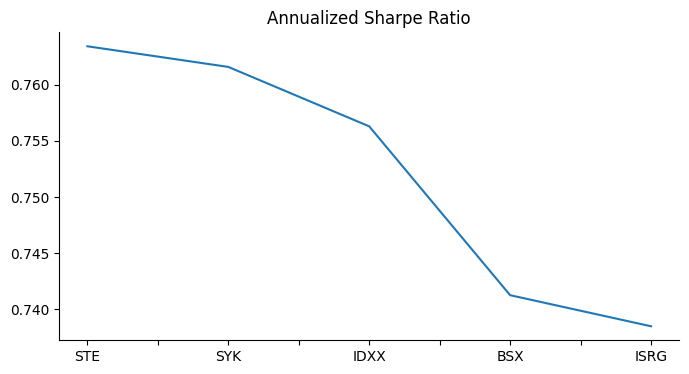

In [ ]:
from matplotlib import pyplot as plt
top_5_sharpe['Annualized Sharpe Ratio'].plot(kind='line', figsize=(8, 4), title='Annualized Sharpe Ratio')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Get the list of top 5 tickers from our Sharpe ratio analysis
top5_tickers = top_5_sharpe.index.tolist()
top5_tickers

['STE', 'SYK', 'IDXX', 'BSX', 'ISRG']

In [ ]:
# Extract the excess returns for the top 5 stocks
top5_excess_returns = excess_returns[top5_tickers]
top5_excess_returns


,STE,SYK,IDXX,BSX,ISRG
2010-02-28,0.216208,0.022636,0.005814,-0.103220,0.058068
2010-03-31,0.064728,0.080274,0.089837,-0.067308,0.002727
2010-04-30,-0.011423,0.003711,0.149128,-0.047225,0.035572
2010-05-31,-0.040388,-0.076909,-0.043980,-0.120773,-0.104942
2010-06-30,-0.023663,-0.053271,-0.037102,-0.041422,-0.022252
...,...,...,...,...,...
2024-09-30,0.004430,0.000628,0.045700,0.020642,-0.006694
2024-10-31,-0.089064,-0.017543,-0.198327,-0.001133,0.021828
2024-11-30,-0.013660,0.096996,0.032761,0.075346,0.072055
2024-12-31,-0.065185,-0.083281,-0.023262,-0.018339,-0.040532


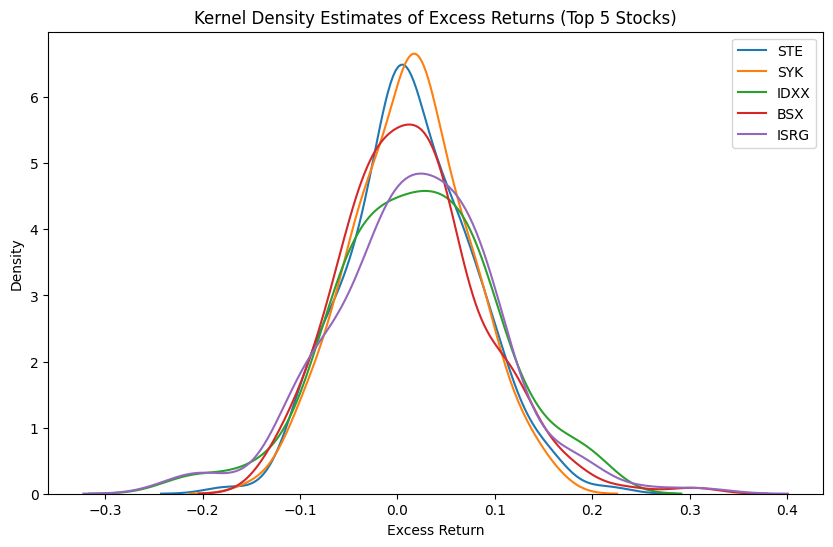

In [ ]:
# Plot KDE for each of the top 5 stocks' excess returns
plt.figure(figsize=(10, 6))
for ticker in top5_tickers:
    sns.kdeplot(top5_excess_returns[ticker].dropna(), label=ticker)
plt.title("Kernel Density Estimates of Excess Returns (Top 5 Stocks)")
plt.xlabel("Excess Return")
plt.ylabel("Density")
plt.legend()
plt.show()

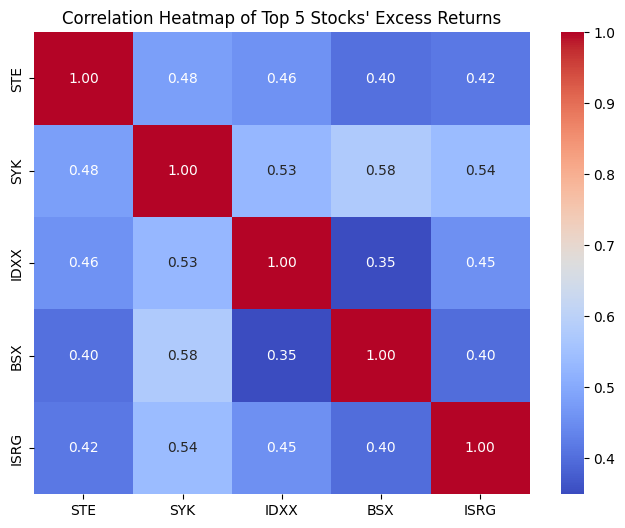

In [ ]:
# Plot correlation heatmap for the top 5 stocks' excess returns
plt.figure(figsize=(8, 6))
corr_matrix = top5_excess_returns.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Top 5 Stocks' Excess Returns")
plt.show()

In [ ]:
# Cell 11: Fama–French Three-Factor Regression for Top 5 Stocks

# Download Fama-French three-factor data (Mkt-RF, SMB, HML) from Kenneth French's Data Library
ff_factors = web.DataReader('F-F_Research_Data_Factors', 'famafrench', start=start_date, end=end_date)[0]

# Convert the index from PeriodIndex (YYYYMM) to a datetime index
ff_factors.index = ff_factors.index.to_timestamp()

# Convert factors from percentages to decimals
ff_factors = ff_factors / 100

print("Fama-French Three-Factor Data (first 5 rows):")
display(ff_factors.head())

print("\nFama-French Three-Factor Regression Results:")

# For each of the top 5 stocks, run the regression on its excess returns.
for ticker in top5_tickers:
    # Merge the excess returns for the ticker with the Fama-French factors
    df_reg = pd.merge(excess_returns[[ticker]], ff_factors, left_index=True, right_index=True, how='inner')

    # Check if merged data is empty; if so, skip this ticker.
    if df_reg.empty:
        print(f"No merged data available for {ticker}. Skipping regression.")
        continue

    # Set up independent variables: Fama-French factors (Mkt-RF, SMB, HML)
    X = df_reg[['Mkt-RF', 'SMB', 'HML']]
    X = sm.add_constant(X)  # add constant term

    # Dependent variable: the excess return for the stock
    y = df_reg[ticker]

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    print(f"\nRegression Results for {ticker}:")
    print(model.summary())

Fama-French Three-Factor Data (first 5 rows):


<ipython-input-34-b894c6cb12a6>:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_factors = web.DataReader('F-F_Research_Data_Factors', 'famafrench', start=start_date, end=end_date)[0]
<ipython-input-34-b894c6cb12a6>:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_factors = web.DataReader('F-F_Research_Data_Factors', 'famafrench', start=start_date, end=end_date)[0]


,Mkt-RF,SMB,HML,RF
Date,,,,
2010-01-01,-0.0336,0.0040,0.0043,0.0000
2010-02-01,0.0340,0.0119,0.0322,0.0000
2010-03-01,0.0631,0.0148,0.0221,0.0001
2010-04-01,0.0200,0.0487,0.0289,0.0001
2010-05-01,-0.0789,0.0009,-0.0244,0.0001



Fama-French Three-Factor Regression Results:
No merged data available for STE. Skipping regression.
No merged data available for SYK. Skipping regression.
No merged data available for IDXX. Skipping regression.
No merged data available for BSX. Skipping regression.
No merged data available for ISRG. Skipping regression.


In [ ]:
# Print a brief summary of the Fama-French regression results for each top stock
print("\nSummary of Fama-French Regression Results for Top Stocks:")
for ticker in top5_tickers:
    # Merge the excess returns for the ticker with Fama-French factors
    df_reg = pd.merge(excess_returns[[ticker]], ff_factors, left_index=True, right_index=True, how='inner')
    if df_reg.empty:
        print(f"{ticker}: No regression data available.")
        continue

    X = sm.add_constant(df_reg[['Mkt-RF', 'SMB', 'HML']])
    y = df_reg[ticker]
    model = sm.OLS(y, X).fit()
    print(f"\n{ticker} Regression Summary:")
    print(f"R-squared: {model.rsquared:.3f}")
    print(f"Coefficients:\n{model.params}\n")


Summary of Fama-French Regression Results for Top Stocks:

STE Regression Summary:
R-squared: 0.383
Coefficients:
const     0.004063
Mkt-RF    0.856440
SMB       0.195962
HML      -0.226925
dtype: float64


SYK Regression Summary:
R-squared: 0.424
Coefficients:
const     0.002314
Mkt-RF    0.924750
SMB      -0.236450
HML      -0.024832
dtype: float64


IDXX Regression Summary:
R-squared: 0.384
Coefficients:
const     0.006515
Mkt-RF    0.986534
SMB       0.543085
HML      -0.492143
dtype: float64


BSX Regression Summary:
R-squared: 0.260
Coefficients:
const     0.005128
Mkt-RF    0.836581
SMB      -0.042311
HML      -0.102775
dtype: float64


ISRG Regression Summary:
R-squared: 0.368
Coefficients:
const     0.003366
Mkt-RF    1.204063
SMB      -0.428337
HML      -0.406661
dtype: float64

